<a href="https://colab.research.google.com/github/Humirephp/Clase_Python/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

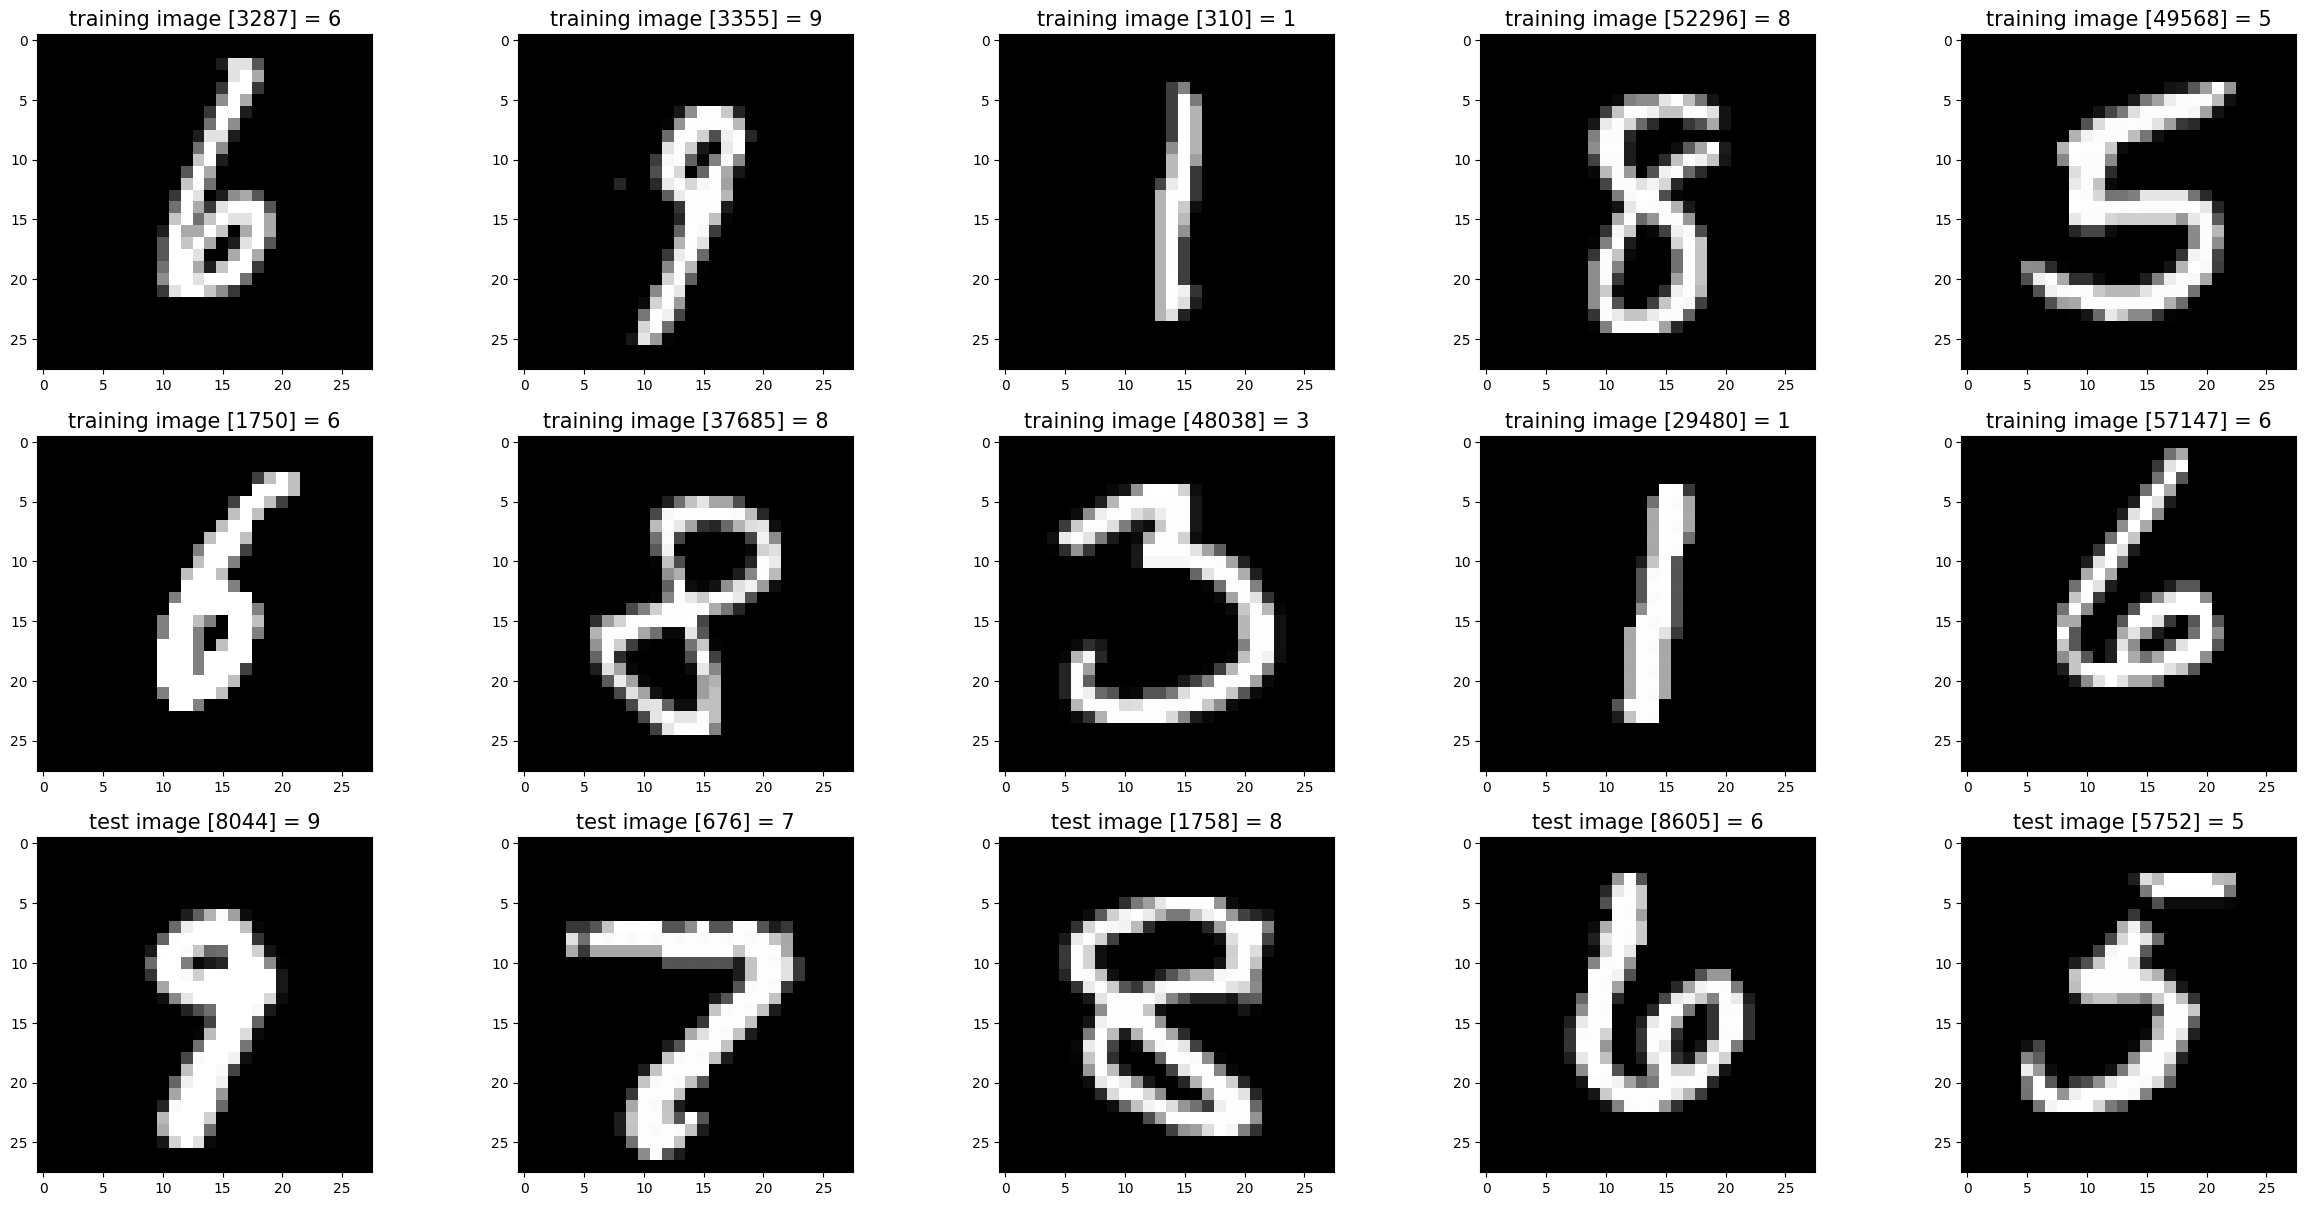

In [71]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
# mas info : https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)
#
# Verify Reading Dataset via MnistDataloader class
#
#%matplotlib inline # type: ignore
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = ''
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1
    plt.show()
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8631 - loss: 0.4844 - val_accuracy: 0.9528 - val_loss: 0.1625
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9588 - loss: 0.1375 - val_accuracy: 0.9670 - val_loss: 0.1122
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9745 - loss: 0.0890 - val_accuracy: 0.9693 - val_loss: 0.1040
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9817 - loss: 0.0609 - val_accuracy: 0.9727 - val_loss: 0.0948
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9867 - loss: 0.0467 - val_accuracy: 0.9725 - val_loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9736 - loss: 0.0907

Precisión en el conjunto de prueba: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Predicciones (números más probables): [7 2 1 0 4]
Etiquetas reales: [7 2 1 0 4]


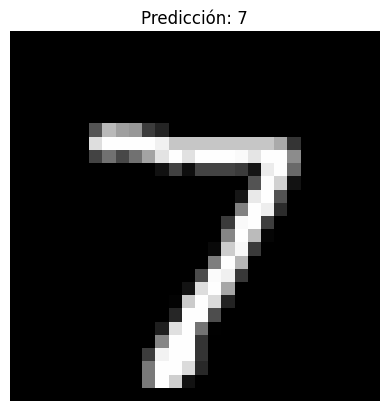

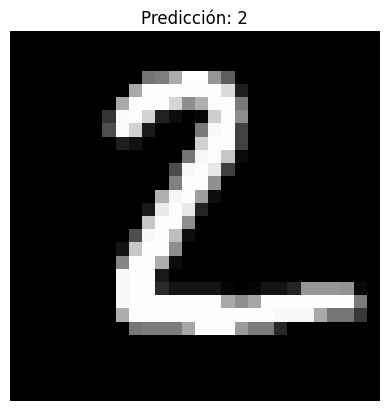

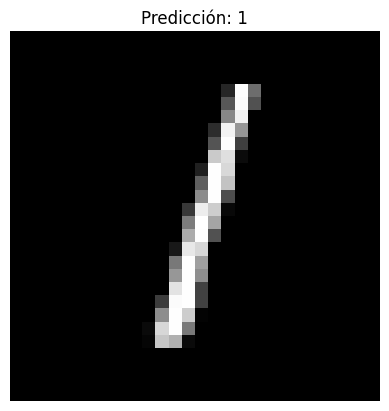

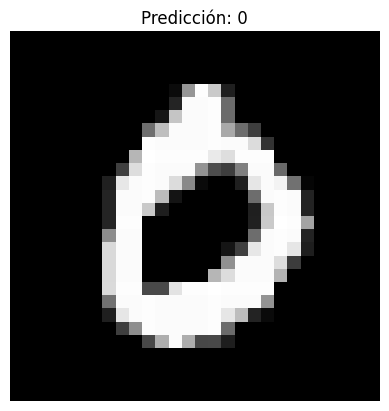

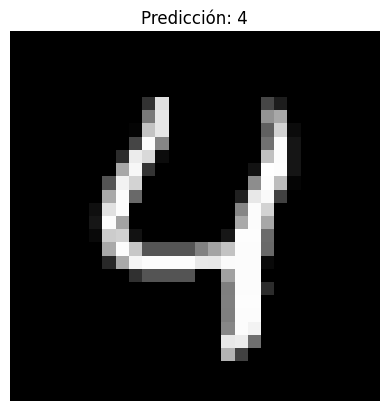

In [72]:
# Paso 1: Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Paso 2: Cargar el dataset MNIST
# Contiene imágenes de dígitos manuscritos (28x28 píxeles) y sus etiquetas (0-9).
# recuerda que cada archivo cargado tiene la siguiente estructura
#   Encabezado: Contiene información sobre cómo están organizados los datos.
#       Los primeros 16 bytes del archivo son el encabezado y contienen la siguiente información:
#
#           Bytes 0-3: El número mágico (4 bytes) que indica el tipo de archivo. Para imágenes de MNIST,
#           este valor es 0x00000801 (32 bits en formato big-endian). Este valor indica que se trata de un archivo de imágenes.
#           Bytes 4-7: El número de elementos en el archivo (número de imágenes). Este valor se almacena en 4 bytes.
#           Bytes 8-11: El número de filas de cada imagen (28 para MNIST).
#           Bytes 12-15: El número de columnas de cada imagen (28 para MNIST).

#       Por ejemplo el archivo train-images.idx3-ubyte,el primer encabezado sería algo similar a:
#n° byte    0  1   2    3   4   5   6   7   8   9   10  11  12  13  14  15
#	        00 00  08   03  00  00  ea  60	00  00  00  1c  00  00  00  1c
#       Esto se desglosa como:
#
#           00 00 08 03 → El número mágico 0x00000803, que indica que es un archivo de imágenes.
#           00 00 ea 60 → Número de imágenes (por ejemplo, 0xea60 en hexadecimal equivale a 60,000 imágenes).
#           00 00 00 1c → Número de filas (28 píxeles).
#           00 00 00 1c → Número de columnas (28 píxeles).

#   Datos de las imágenes: Los valores de los píxeles de las imágenes de los dígitos manuscritos.
#       Después del encabezado, los datos de las imágenes siguen. Cada imagen está representada por un
#       vector de píxeles de 28x28, es decir, 784 píxeles (28 * 28). Cada píxel se almacena como un valor
#       en un byte bajo el sistema hexadecimal, representando la intensidad del píxel (un valor entre 0
#       y 255, donde 0 es negro y 255 es blanco)
#
#        Por ejemplo, en los datos que proporcionas:

#n° byte    0   1   2    3   4   5   6   7   8   9   10  11  12  13  14  15
#        	00  00  00  00  00  00  00  00	00  00  00  00  00  00  00  00
#        	00  00  00  00  00  00  00  00	00  00  00  00  00  00  00  00
#        	00  00  00  00  00  00  00  00	00  00  00  00  00  00  00  00
#        	00  00  00  00  00  00  00  00	00  00  00  00  00  00  00  00
#        	00  00  00  00  00  00  00  00	00  00  00  00  00  00  00  00
#           ...
#           00  00  00  00  00  00  00  00  03  12  12  12  7e  88  af  1a
#           ...
#       Cada bloque de 28 bytes después del encabezado correspondería a una fila de píxeles de una imagen.
#       Todos los valores están en formato hexadecimal.
#
#       Por ejemplo:
#
#       00 o 00 → Esto podría representar un píxel completamente negro (0).
#       03 o 12 → Un valor más alto que indica un píxel más brillante.
#       7e o 88 → Un valor aún más alto.

#   Una vez que lees los valores de píxeles, puedes reconstruir la imagen a partir de los 784 píxeles.
#   Cada imagen de MNIST tiene 28 filas y 28 columnas, y cada valor hexadecimal se convierte a su
#   valor decimal (entre 0 y 255). Luego puedes representar esos valores como una imagen en una
#   matriz de 28x28 el cuaL load_data lo separa 50000 muestras de entrenamiento y 100000 muestras
#   de prueba el cual esta por defecto.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Normalizar las imágenes
# Normalizar los valores de los píxeles para que estén entre 0 y 1
# (dividiendo entre 255), o usar una normalización diferente según sea necesario
# para el modelo.
# x_train = x_train / 255.0  # Normalizar a valores entre 0 y 1
# x_test = x_test / 255.0
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Paso 4: Codificar las etiquetas a formato one-hot
# Las etiquetas se convierten a formato one-hot para usar con categorical_crossentropy.
# es una función de pérdida ampliamente utilizada en problemas de clasificación multiclase en
# aprendizaje automático, particularmente en redes neuronales. Su propósito es medir la
# discrepancia entre las distribuciones de probabilidad predichas por un modelo y las
# distribuciones reales (etiquetas verdaderas)
#La función de pérdida de entropía cruzada compara dos distribuciones de probabilidad:
#   Distribución real (𝑦true): generalmente representada como un vector one-hot que indica la clase correcta.
#   Distribución predicha (𝑦pred): las probabilidades estimadas por el modelo para cada clase.
#   mas info : https://www.lokad.com/es/definicion-de-entropia-cruzada/
y_train = to_categorical(y_train, 10)  # 10 clases (dígitos del 0 al 9)
y_test = to_categorical(y_test, 10)

# Paso 5: Construir el modelo
#Se define una red con capas densas y una activación softmax para salida categórica.
#En el modelo presentado, cada neurona tiene un valor de activación que resulta de
#aplicar una función de activación sobre la suma ponderada de sus entradas (los
# valores de las neuronas de la capa anterior más un sesgo). A continuación,
# desglosamos cómo se calculan estos valores y qué representan en las diferentes capas
# del modelo:
# 1. Capa de entrada (Flatten)
#   Entrada: La imagen 28x28 se aplana en un vector de 784 valores.
#   Valores: Cada valor es la intensidad normalizada de un píxel (entre 0 y 1, después de dividir por 255).
#   Ejemplo: Si el píxel tiene un valor de 128 en escala de 8 bits (0-255),
#   su valor normalizado será 128/255≈0.502
# 2. Capa oculta (Dense(128, activation='relu'))
#   Cálculo: Cada neurona calcula:
#       784
#   z =  ∑ (w[i] . x[i])+b
#       i=1
#    donde:
#        𝑤[i]    :   Peso asociado a la conexión de la entrada
#        𝑥[𝑖]    :   Valor de activación de la capa de entrada (los píxeles).
#        b       :   Sesgo (bias) aprendido por la red.
#
#    Activación: Se aplica la función ReLU f(z)=max(0,z)), que pasa los valores positivos sin
#       cambios y convierte los valores negativos en 0.
#    Valores: Después de la activación, los valores de las neuronas son mayormente positivos o 0.
#
#   3. Capa de salida (Dense(10, activation='softmax'))
#           Cálculo: Cada neurona en esta capa calcula:
#                   128
#           𝑧[j] =   ∑ (𝑤[𝑖][𝑗]⋅𝑎[𝑖])+𝑏[𝑗]
#                   𝑖=1
#
#       donde :
#           𝑤[𝑖][𝑗],𝑎[𝑖] y 𝑏[𝑗]  son análogos a los de la capa oculta.
#
#   Activación: La función softmax convierte los valores 𝑧[𝑗] en probabilidades:
#                  𝑧[𝑗]
#    𝑃(𝑦=𝑗) =     𝑒
#            __________
#              10   𝑧[𝑘]
#              ∑   𝑒
#              𝑘=1
#
#   Cada neurona de esta capa devuelve una probabilidad asociada a una clase (dígito 0-9).
#   Valores: Cada valor está entre 0 y 1, y la suma de todos los valores es igual a 1.
#
#    Ejemplo de valores típicos:
#        Capa de entrada:
#            Valores en el rango [0,1] (intensidad del píxel).
#        Capa oculta:
#            La mayoría de las neuronas tienen activaciones > 0 debido a ReLU, pero algunas pueden
#            ser 0 (si 𝑧 ≤ 0).
#        Capa de salida:
#            Ejemplo de salida softmax: [0.1,0.05,0.05,0.8,0.0,0.0,0.0,0.0,0.0,0.0] indicando que el
#            modelo predice con mayor confianza el dígito 3.
#
#   En cada paso, los valores evolucionan para capturar patrones jerárquicos, desde información de
#   píxeles (entrada), características intermedias (oculta) y probabilidades de clase (salida).

#   Los pesos (𝑤) y los sesgos (𝑏) son los parámetros aprendidos por una red neuronal durante
#   el entrenamiento. Estos valores determinan cómo cada neurona responde a sus entradas.

#   ¿Qué son los pesos (w) y los sesgos (𝑏)?
#   Pesos (𝑤):
#       Representan la importancia de cada conexión entre dos neuronas.Son inicializados aleatoriamente
#       al comienzo del entrenamiento y ajustados en cada iteración para minimizar el error del
#       modelo.Un peso alto significa que la entrada tiene un impacto significativo en la salida
#       de la neurona.
#
#   Sesgos (b):
#
#       Son valores adicionales aprendidos por cada neurona para desplazar la salida.
#       Permiten que la neurona modele datos que no están perfectamente centrados en el origen
#       (es decir, cuando todas las entradas son 0, el sesgo puede hacer que la neurona tenga
#       un valor distinto de 0).
#
#   ¿Qué son 𝑎𝑖 y 𝑏𝑗?
#   𝑎𝑖: Es la salida (o activación) de una neurona 𝑖 en una capa previa.
#
#   En términos matemáticos:
#
#
#   𝑎𝑖=𝑓(𝑧𝑖)
#
#   donde
#   𝑧𝑖 : es la suma ponderada ( ∑𝑤⋅𝑥 + 𝑏) y 𝑓 es la función de activación (ReLU, sigmoid, etc.).
#   𝑏𝑗 : Es el sesgo asociado a la neurona 𝑗 en una capa.

#¿Cómo se calculan los valores en una capa?
#    Para una capa con 𝑛 neuronas:
#
#1.- Cada neurona 𝑗 calcula una suma ponderada de sus entradas:
#         𝑚
#    𝑧𝑗=  ∑ 𝑤𝑖𝑗⋅𝑎𝑖+𝑏𝑗
#        𝑖=1
#
#    Donde :
#        𝑚: Número de neuronas de la capa anterior.
#        𝑤𝑖𝑗 : Peso entre la neurona 𝑖 de la capa previa y la neurona 𝑗 actual.
#        𝑎𝑖 : Activación de la neurona i de la capa previa.
#        𝑏𝑗 : Sesgo de la neurona
#
#
#Aplica la función de activación (𝑓) al valor 𝑧𝑗 para obtener 𝑎𝑗 :
#        𝑎𝑗=𝑓(𝑧𝑗)
#
#Por ejemplo:
#    Para ReLU: 𝑓(𝑧𝑗)=max⁡(0,𝑧𝑗) :
#        La función de activación ReLU (Rectified Linear Unit) es una función que se utiliza
#        en redes neuronales para convertir entradas negativas en cero y emitir directamente las
#        entradas positivas. Es la función de activación más utilizada en el mundo y
#        se usa en casi todas las redes neuronales convolucionales o de aprendizaje profundo
#    Para softmax:
#       Se transforma en una probabilidad relativa a las otras salidas.
#       es una función de activación que se utiliza en la capa de salida de una red neuronal
#       para realizar la clasificación multiclase. Esta función se utiliza para convertir las
#       salidas de la capa anterior en probabilidades que suman uno. Las probabilidades se
#       utilizan para medir la confianza del modelo en la pertenencia a cada clase.

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar imágenes 28x28 a un vector de 784
    Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y ReLU
    Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase)
])
#imagen visual de red neuronal : https://panamahitek.com/wp-content/uploads/2023/04/Pasted-9.png
#softmax : https://jacar.es/funcion-softmax-activacion-para-la-clasificacion/
#RELU : https://codificandobits.com/blog/funcion-de-activacion/

# Paso 6: Compilar el modelo
#¿Cómo se actualizan los pesos y sesgos?
#El proceso de ajuste ocurre durante el entrenamiento, mediante el algoritmo de retropropagación y
#un optimizador (como Adam o SGD).
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 7: Entrenar el modelo
#   Cuando ejecutas model.fit(), el modelo realiza los siguientes pasos para entrenarse:
#
#   División del conjunto de datos:
#
#   Se separa el conjunto de datos de entrada en:
#   Conjunto de entrenamiento (80%): Usado para entrenar el modelo.
#   Conjunto de validación (20%): Usado para evaluar el desempeño después de cada época
#   (sin ajustar los pesos con este conjunto).

#   Forward Propagation (Propagación hacia adelante):
#       Para cada lote (batch), el modelo:
#       Pasa las imágenes por la red capa a capa.
#       Calcula las predicciones (valores de salida).

#   Cálculo de la pérdida (Error):
#      Compara las predicciones con las etiquetas reales (𝑦) usando la función de pérdida
#       definida al compilar el modelo (categorical_crossentropy en este caso).
#       Genera un número que mide qué tan lejos está el modelo de la respuesta correcta.

#   Backward Propagation (Retropropagación):
#
#   Calcula los gradientes de la pérdida respecto a los pesos (𝑤) y sesgos (𝑏) del modelo
#   usando el algoritmo de backpropagation.
#
#   Actualización de parámetros:
#   Usa los gradientes calculados y un optimizador (en este caso, Adam) para ajustar los pesos
#    y sesgos:
#
#   epochs=5:
#       Es el número de veces que el modelo verá todo el conjunto de entrenamiento.
#       Una época significa que el modelo procesa todos los ejemplos del conjunto de datos una
#       vez (dividido en lotes).

#   batch_size=32:
#       Define el número de ejemplos que el modelo procesa antes de actualizar los pesos.
#       En este caso, el modelo procesa los datos en grupos de 32 imágenes (lotes) antes de
#       ajustar los parámetros (pesos y sesgos).

#   validation_split=0.2:
#       Proporción de los datos de entrenamiento que se reserva para la validación.
#       Aquí, el 20% de los datos de x_train y y_train se apartan para validar el desempeño del
#       modelo en cada época (asegurando que no se entrena con estos datos).

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Paso 8: Evaluar el modelo, Se mide el desempeño en el conjunto de prueba.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.2f}')

# Paso 9: Predecir nuevos valores, predice los dígitos de imágenes nuevas.
import numpy as np
predictions = model.predict(x_test[:5])  # Predecir los primeros 5 dígitos
print("\nPredicciones (números más probables):", np.argmax(predictions, axis=1))
print("Etiquetas reales:", np.argmax(y_test[:5], axis=1))

# Paso 10: Visualizar resultados,Se grafican las imágenes junto con las predicciones.
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicción: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()
